# Log Likelihood

The log likelihood is a measure of how well a model explains the data. It is used in maximum likelihood estimation to estimate the parameters of a model. The log likelihood is the logarithm of the likelihood function. The likelihood function is the probability of the data given the model parameters. The log likelihood is used because it is easier to work with than the likelihood function. The log likelihood is used in many statistical models, including linear regression, logistic regression, and survival analysis.

https://it.wikipedia.org/wiki/Funzione_di_verosimiglianza
https://youtu.be/XepXtl9YKwc?si=grjQYZ8ka5NsAGfC
https://youtu.be/BfKanl1aSG0?si=wsKKikNgM_oPDxWa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

In [2]:
# Generazione di dati di esempio
np.random.seed(42)
n = 100
X = np.random.rand(n, 1)  # Variabile indipendente
X = np.c_[np.ones_like(X), X]  # Aggiunta del termine di bias (intercetta)
true_beta = np.array([2, 3])  # Coefficienti reali
y = X @ true_beta + np.random.normal(0, 1, size=n)  # Variabile dipendente con rumore

In [3]:
# Definizione della log-likelihood
# La log-likelihood di una distribuzione normale è proporzionale a:
# L(beta, sigma^2) = -n/2 log(2*pi) - n/2 log(sigma^2) - 1/(2*sigma^2) * RSS
# Dove RSS = somma dei residui al quadrato

def log_likelihood(params):
    beta = params[:-1]  # Coefficienti della regressione
    sigma = params[-1]  # Deviazione standard degli errori
    
    if sigma <= 0:
        return np.inf  # Per evitare valori di sigma non validi

    residuals = y - X @ beta
    rss = np.sum(residuals ** 2)
    ll = -n / 2 * np.log(2 * np.pi) - n / 2 * np.log(sigma ** 2) - rss / (2 * sigma ** 2)
    return -ll  # Negativo perché minimizziamo

In [4]:
# Inizializzazione dei parametri
initial_params = np.append(np.zeros(X.shape[1]), 1)  # Coefficienti iniziali e sigma

In [5]:
# Ottimizzazione della log-likelihood
result = minimize(log_likelihood, initial_params, method='L-BFGS-B', bounds=[(None, None)] * X.shape[1] + [(1e-5, None)])

In [6]:
# Risultati
optimized_params = result.x
beta_hat = optimized_params[:-1]
sigma_hat = optimized_params[-1]

print("Coefficienti stimati (beta):", beta_hat)
print("Deviazione standard stimata (sigma):", sigma_hat)
print("Log-likelihood massima:", -result.fun)

Coefficienti stimati (beta): [2.21509437 2.54023294]
Deviazione standard stimata (sigma): 0.8981008978144275
Log-likelihood massima: -131.1465266264861


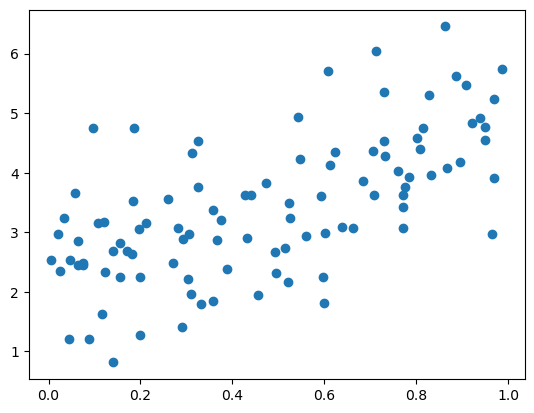

In [7]:
plt.scatter(X[:, 1], y)
plt.show()